Características de Sistemas de Primer Orden
=================================
Los sistemas de primer orden son aquellos que pueden describirse mediante una ecuación diferencial de primer orden. Estos sistemas tienen varias características distintivas:
1. **Respuesta Exponencial**: La respuesta de un sistema de primer orden a una entrada escalón es típicamente una función exponencial que se aproxima a un valor final con el tiempo.
2. **Constante de Tiempo (τ)**: La constante de tiempo es un parámetro clave que determina la velocidad de respuesta del sistema. Un valor más pequeño de τ indica una respuesta más rápida.
3. **Estabilidad**: Los sistemas de primer orden son inherentemente estables si la constante de tiempo es positiva.
4. **Función de Transferencia**: La función de transferencia de un sistema de primer orden generalmente tiene la forma $\frac{K}{\tau s + 1}$, donde K es la ganancia del sistema.
5. **Simplicidad**: Los sistemas de primer orden son más simples de analizar y diseñar en comparación con sistemas de orden superior, lo que los hace ideales para aplicaciones básicas de control y modelado.
Estos aspectos hacen que los sistemas de primer orden sean fundamentales en el estudio de la teoría de control y en diversas aplicaciones de ingeniería.

Polos y ceros de la Función de Transferencia
---------------------------------------
En un sistema de primer orden, la función de transferencia típicamente tiene la forma:
$$G(s) = \frac{K}{\tau s + 1}$$
Donde:
- $K$ es la ganancia del sistema.
- $\tau$ es la constante de tiempo del sistema.
El polo de la función de transferencia se encuentra en:
$$s = -\frac{1}{\tau}$$
No hay ceros en un sistema de primer orden típico. La ubicación del polo en el semiplano izquierdo indica que el sistema es estable.


Ejemplo de aplicación: Control de velocidad de un motor DC
----------------------------------------------  
Consideremos un motor de corriente continua (DC) cuya dinámica puede modelarse como un sistema de primer orden. La función de transferencia que relaciona la velocidad angular del motor ($\omega$) con el torque de entrada ($T$) es:
$$G(s) = \frac{\omega(s)}{T(s)} = \frac{1}{Js + B}$$
Donde:
- $J$ es el momento de inercia del rotor.
- $B$ es el coeficiente de fricción viscosa.
Este sistema tiene un polo en:
$$s = -\frac{B}{J}$$
La constante de tiempo del sistema es:
$$\tau = \frac{J}{B}$$
La respuesta del motor a un cambio en el torque de entrada será una función exponencial que se aproxima a la velocidad final con una constante de tiempo $\tau$. Este modelo es útil para diseñar controladores que regulen la velocidad del motor de manera eficiente.


Ejercicio 1. Analizar el sistema de control de velocidad de un motor DC
------------------------------------------------
Caso 1: Suponga que un motor DC tiene un momento de inercia $J = 0.01 \, kg \cdot m^2$ y un coeficiente de fricción viscosa $B = 0.1 \, N \cdot m \cdot s$. Determine la función de transferencia del sistema, la ubicación del polo y la constante de tiempo. Analice la estabilidad del sistema y describa cómo respondería a un cambio en el torque de entrada.



In [ ]:
# Escriba las líneas de código para importar las bibliotecas necesarias, numpy, matplotlib, control
# importar solo solve_ivp de scipy.integrate


In [ ]:
# Función resolve euler
def f_euler(f, tspan, x0, h):
    class Solution:
        pass
    sol = Solution()
    t0, tf = tspan
    N = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, N)
    x = np.zeros((len(x0), N))
    x[:, 0] = x0
    for i in range(1, N):
        x[:, i] = x[:, i-1] + h * f(t[i-1], x[:, i-1])
    sol.t = t
    sol.y = x
    return sol

In [ ]:
# Defina la Función con la ecuación diferencial que describe el sistema de primer orden, cuyo parámetros de entrada son x y t
def f(t, x):
    # Parámetros del sistema

    
    dxdt = 0 # Completar con la ecuación diferencial del sistema de primer orden
    return dxdt

def entrada_escalon(t):
    if t >= 0:
        return 1
    else:
        return 0

In [ ]:
# Parámetros del sistema CASO 1: Baja inercia y bajo amortiguamiento
J = 0.01  # Inercia
B = 0.1   # Amortiguamiento
# Función de transferencia 
# usar tf de la librería de control

# Polos del sistema
# usar poles --> método del tipo tf

# Valor de Tau

In [ ]:
# Solución de la ecuación diferencial 
# Tiempo de simulación
# Definir paso de integración y tiempo de simulación.
h = 
tsimu =
tspan = [0, tsimu]

# Condición inicial
x0 = 0

# Solución de la ecuación diferencial utilizando euler
# usar la función f_euler definida anteriormente
# f_euler(f, tspan, x0, h)  
# donde: f es la función que define la ecuación diferencial, 
#       tspan es el intervalo de tiempo,
#       x0 es la condición inicial 
#       y h es el paso de integración.
# Salida de la función: sol.t (tiempo) y sol.y (respuesta del sistema)



# Solución con solve_ivp
# usar solve_ivp de scipy.integrate
# solve_ivp(f, tspan, x0)
# solve_ivp(f,t_span,x0, method = 'RK45') # RK45 es el método por defecto, RK23, DOP853, Radau, BDF, LSODA
#




In [ ]:
## Gráficas:

In [ ]:
# Parámetros del sistema: CASO 2: Alta inercia y bajo amortiguamiento
J = 1.0  # Inercia
B = 0.1   # Amortiguamiento
# Función de transferencia 
# usar tf de la librería de control

# Polos del sistema
# usar poles --> método del tipo tf

# Valor de Tau

In [ ]:
# Solución de la ecuación diferencial 
# Tiempo de simulación
# Definir paso de integración y tiempo de simulación.
h = 
tsimu =
tspan = [0, tsimu]

# Condición inicial
x0 = 0

# Solución de la ecuación diferencial utilizando euler
# usar la función f_euler definida anteriormente
# f_euler(f, tspan, x0, h)  
# donde: f es la función que define la ecuación diferencial, 
#       tspan es el intervalo de tiempo,
#       x0 es la condición inicial 
#       y h es el paso de integración.
# Salida de la función: sol.t (tiempo) y sol.y (respuesta del sistema)



# Solución con solve_ivp
# usar solve_ivp de scipy.integrate
# solve_ivp(f, tspan, x0)
# solve_ivp(f,t_span,x0, method = 'RK45') # RK45 es el método por defecto, RK23, DOP853, Radau, BDF, LSODA
#




In [ ]:
## Gráficas:

Sintonización de la Ganacia
---------------------------------------
La sintonización de la ganancia en un sistema de primer orden implica ajustar el valor de $K$ en la función de transferencia:
$$G(s) = \frac{K}{\tau s + 1}$$
Aumentar la ganancia $K$ generalmente mejora la rapidez de la respuesta del sistema, pero también puede llevar a una mayor oscilación o incluso inestabilidad si no se maneja adecuadamente. La sintonización adecuada de la ganancia es crucial para lograr un equilibrio entre la velocidad de respuesta y la estabilidad del sistema.

Lugar de las raíces
---------------------------------------
El lugar de las raíces es una herramienta gráfica utilizada para analizar cómo varían los polos de un sistema de control en función de la ganancia $K$. En un sistema de primer orden, el polo se mueve a lo largo del eje real negativo a medida que se ajusta la ganancia. Esto permite a los ingenieros visualizar cómo los cambios en la ganancia afectan la estabilidad y el rendimiento del sistema.
En Python, se puede utilizar la librería `control` para trazar el lugar de las raíces de un sistema de primer orden. Aquí hay un ejemplo de cómo hacerlo:

```python
import control as ct
import matplotlib.pyplot as plt

# Parámetros del sistema
K = 1.0  # Ganancia
tau = 0.1  # Constante de tiempo

# Función de transferencia
G = ct.tf([K], [tau, 1])

# Lugar de las raíces
rlist = ct.root_locus(G, Plot=True)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


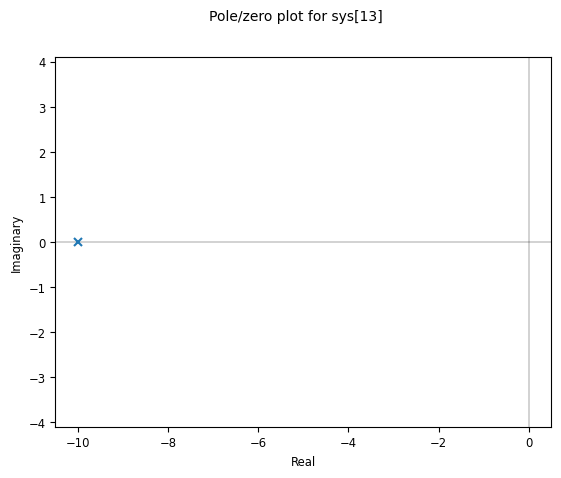

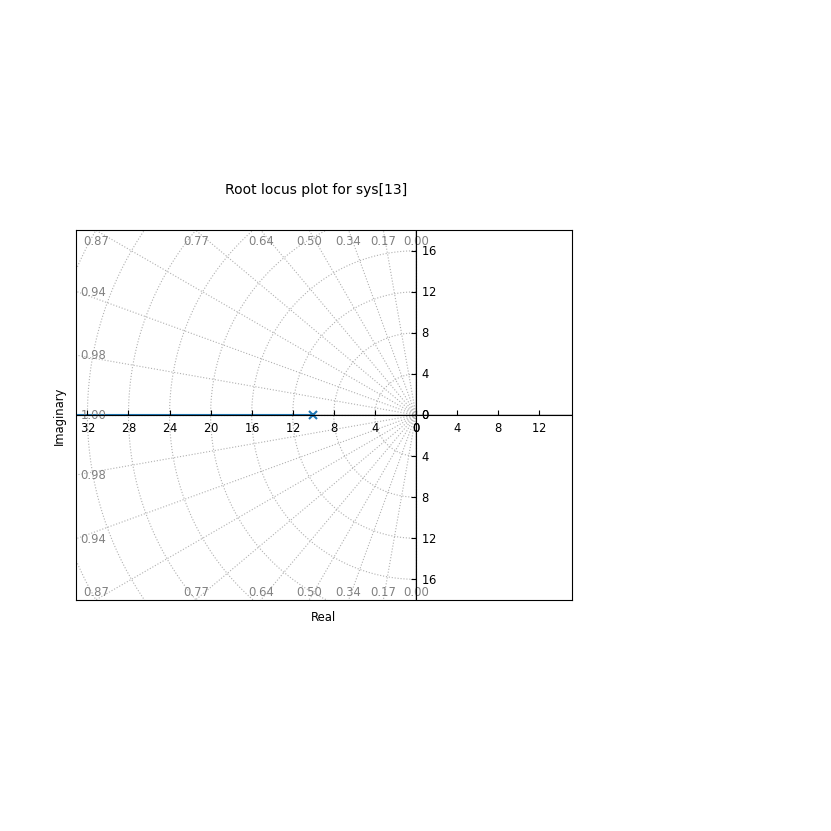

In [23]:
# Parámetros del sistema
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
K = 1.0  # Ganancia
tau = 0.1  # Constante de tiempo

# Función de transferencia
G = ct.tf([K], [tau, 1])


# Lugar de las raíces
respuesta = ct.pole_zero_map(G)
plt.figure()
ct.pole_zero_plot(respuesta)
plt.figure()
a = ct.root_locus(G)

In [38]:
a= ct.root_locus_map(G)

In [47]:
import pandas as pd

tabla = pd.DataFrame({
    'Ganancia K': a.gains,
    'Raíces': [list(raices) for raices in a.loci]
})
tabla

,Ganancia K,Raíces
0,0.000000,[-10.0]
1,0.000000,[-10.0]
2,0.002041,[-10.020408163265305]
3,0.004082,[-10.040816326530612]
4,0.006122,[-10.061224489795919]
5,0.008163,[-10.081632653061225]
6,0.010204,[-10.102040816326529]
7,0.012245,[-10.122448979591836]
8,0.014286,[-10.142857142857142]
9,0.016327,[-10.163265306122447]
